<a href="https://colab.research.google.com/github/RestrepoTorres/hackaton_expoingenieria/blob/master/Copia_de_Hackaton_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center><h1>DATATHON EXPOINGENIERÍA 2023</h1></center>


**<center><h1>Exploración de datos</h1></center>**

# Importando las librerías

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go

In [ ]:
df = pd.read_excel('/content/Datos_anonimizados_sin_llave.xlsx', index_col='AntencionPaciente llave',  na_values = ['',"Sin informacion en base de datos","Sin informacion"])

# Información del dataframe

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43154 entries, 1 to 43154
Data columns (total 72 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vGenero                            43154 non-null  int64  
 1   EdadEgreso                         43154 non-null  int64  
 2   Año_Salida                         43154 non-null  int64  
 3   MES                                43154 non-null  object 
 4   Tipo_Afiliacion                    43154 non-null  int64  
 5   Aseguradora                        43154 non-null  int64  
 6   Modalidad_Contrato                 43154 non-null  int64  
 7   Aseguradora2                       43154 non-null  int64  
 8   Hospitalizacion                    43154 non-null  int64  
 9   bloque                             43154 non-null  object 
 10  piso                               43154 non-null  object 
 11  Tipo_Internacion                   42945 non-null  obj

# Cantidad de valores nulos por columnas

In [ ]:
df.isna().sum().sort_values(ascending= False)

D_DX_F3_R3                 42242
D_DX_F3_R2                 41843
D_DX_MUERTE                39736
D_Subcapitulo_DX_Muerte    39736
D_capitulo_DX_Muerte       39736
                           ...  
DX_R3                          0
DX_F3                          0
EdadEgreso                     0
DX_F3_R1                       0
UCI_UCE                        0
Length: 72, dtype: int64

# Porcentaje de valores nulos por columnas mayores a 30%

In [ ]:
data_with_percentages = [x for x in (list((100*df.isna().sum()/df.shape[0]).sort_values(ascending=False))) if x > 30]
data_with_percentages

[97.88663855030819,
 96.96204291606803,
 92.0795291282384,
 92.0795291282384,
 92.0795291282384,
 88.6360476433239,
 67.4862121703666,
 67.4862121703666]

**<center><h1>Limpieza de datos</h1></center>**

# Eliminación de las columnas que tienen un alto porcentaje de nulos (> 30)

In [ ]:
df.drop(columns = [
    'D_DX_F3_R3',
    'D_DX_F3_R2',
    'D_DX_MUERTE',
    'D_Subcapitulo_DX_Muerte',
    'D_capitulo_DX_Muerte',
    'D_DX_F3_R1',
    'D_DX_pre_cx',
    'D_DX_pos_cx',
    'Año_Salida', # Esta variable no importa porque solo importan los días
    ], inplace = True)

# Rellenar los datos nulos de cada columna con la moda

In [ ]:
for column in df.columns:
  df[column] = df [column].fillna(df[column].mode())
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43154 entries, 1 to 43154
Data columns (total 63 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   vGenero                            43154 non-null  int64  
 1   EdadEgreso                         43154 non-null  int64  
 2   MES                                43154 non-null  object 
 3   Tipo_Afiliacion                    43154 non-null  int64  
 4   Aseguradora                        43154 non-null  int64  
 5   Modalidad_Contrato                 43154 non-null  int64  
 6   Aseguradora2                       43154 non-null  int64  
 7   Hospitalizacion                    43154 non-null  int64  
 8   bloque                             43154 non-null  object 
 9   piso                               43154 non-null  object 
 10  Tipo_Internacion                   42945 non-null  object 
 11  Ciclo_Vital                        43154 non-null  int

# Matriz de correlación absoluta entre columnas

<ipython-input-8-ef65b20f4309>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

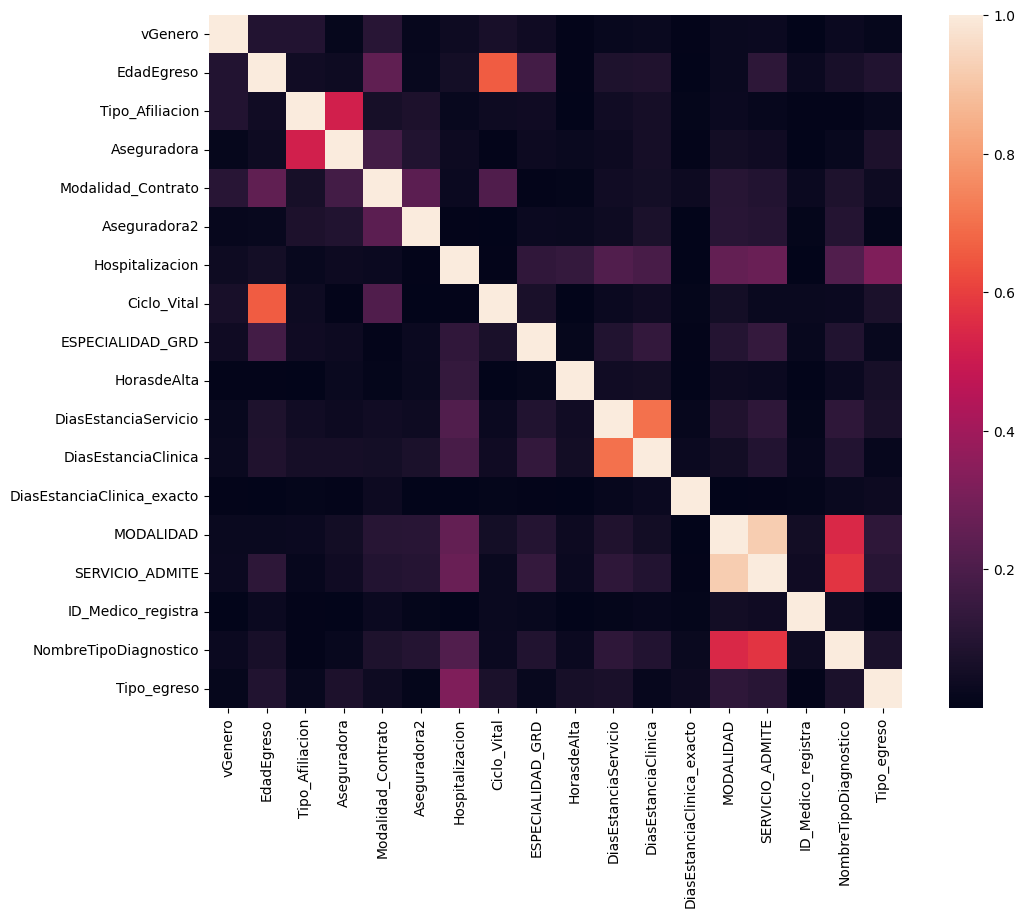

In [ ]:
corr = df.corr()
abs_corr = corr.abs()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(abs_corr, square=True)

# Transformación de las columnas categóricas a numéricas

In [ ]:
df_copy = df

categorical_columns=df_copy.select_dtypes("O").columns
d={}
for column in categorical_columns:
  categoryColumn=df_copy[column].astype('category')
  df_copy[column] = categoryColumn.cat.codes
  d[column]=dict(enumerate(categoryColumn.cat.categories))

**<center><h1>Exportación del dataframe a formato Excel</h1></center>**

In [ ]:
df_copy.to_excel("process_data.xlsx", sheet_name="dataframe_numerico", index=False)